#Projekt 1
##1. Napisz program, uczący się gry “papier, kamień, nożyce”. Jako algorytm uczący zastosuj łańcuch Markowa z macierzą przejść pomiędzy trzema stanami (Papier, Kamień, Nożyce). Nauka gry polega na korekcie macierzy przejść (prawdopodobieństwa warunkowe zmiany stanu),
##2. Wartość wypłaty: 1 w przypadku wygranej, −1 w przypadku przegranej i 0 w przypadku remisu,
##3. Przeprowadź ciąg kilkudziesięciu gier “kamień, papier, nożyce”. Sporząź wykres jak zmienia się stan kasy w każdym kroku gry.

podaj wartosc: K
ai
podaj wartosc: N
remis
podaj wartosc: P
remis
podaj wartosc: K
remis
podaj wartosc: P
ai
podaj wartosc: N
ai
podaj wartosc: K
player
podaj wartosc: K
ai
podaj wartosc: N
player
podaj wartosc: P
ai
podaj wartosc: N
player
podaj wartosc: K
ai
podaj wartosc: P
player
podaj wartosc: K
ai
podaj wartosc: N
remis
podaj wartosc: K
remis
podaj wartosc: P
ai
podaj wartosc: P
player
podaj wartosc: K
player
podaj wartosc: N
remis
player score: -2
ai score: 2


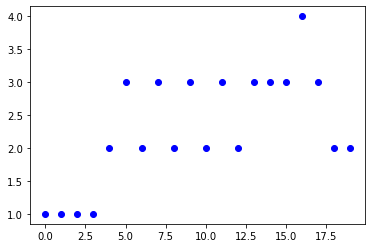

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
lista = []
ai_score = 0
player_score = 0
stan = ['P', 'K', 'N']
p_start = [0.33, 0.33, 0.34]
#ruch po wyst P K N
p_check = [[0,0,0],[0,0,0],[0,0,0]]
p_next = [[0.33, 0.33, 0.34], [0.33, 0.33, 0.34], [0.33, 0.33, 0.34]]
n=20
st = 1
player_move = o = input("podaj wartosc: ")
#funkcja sprawdzająca czy wartośc prawdopodbieństw nie są graniczące z 1 lub 0, a jeśli są to podstawia odp wartości w tablicy pomocniczej, która jest sprawdzana potem w metodzie make_chcange
def check():
  for i in range(len(p_next)):
    for j in range(len(p_next[i])):
      if p_next[i][j] <= 0.1:
         p_check[i][j] = -1
      elif p_next[i][j] >= 0.9:
         p_check[i][j] = 1
      else:
         p_check[i][j] = 0

  
#ruch ai z uwzglednieniem ostatni ruch gracza
def aimove(prev):
  if prev == 'P':
    return np.random.choice(stan,p=p_next[0])
  elif prev == 'K':
    return np.random.choice(stan,p=p_next[1])
  elif prev == 'N':
    return np.random.choice(stan,p=p_next[2])
#poczatkowy ruch ai
def aimovestart():
  return np.random.choice(stan,p=p_start)

#badanie wyniku
def result(player, ai):
  if player == ai:
    return 'remis'
  elif player == 'P':
    if ai == 'N':
      return 'ai'
    elif ai == 'K':
      return 'player'
  elif player == 'K':
    if ai == 'N':
      return 'player'
    elif ai == 'P':
      return 'ai'
  elif player == 'N':
    if ai == 'K':
      return 'ai'
    elif ai == 'P':
      return 'player'
#robienie zmian w prowdopodobienstwie uwzgledniajac ostatni ruch gracza
def make_change(prev, curr):
  if prev == 'P':
    if curr == 'P':
      if p_check[0][0]!=-1 and p_check[0][1]!=-1 and p_check[0][2]!=1:
         p_next[0][0]=p_next[0][0]-0.05
         p_next[0][1]=p_next[0][1]-0.05
         p_next[0][2]=p_next[0][2]+0.1
    elif curr == 'K':
      if p_check[0][0]!=1 and p_check[0][1]!=-1 and p_check[0][2]!=-1:
         p_next[0][0]=p_next[0][0]+0.1
         p_next[0][1]=p_next[0][1]-0.05
         p_next[0][2]=p_next[0][2]-0.05
    elif curr == 'N':
      if p_check[0][0]!=-1 and p_check[0][1]!=1 and p_check[0][2]!=-1:
         p_next[0][0]=p_next[0][0]-0.05
         p_next[0][1]=p_next[0][1]+0.1
         p_next[0][2]=p_next[0][2]-0.05
  elif prev == 'K':
    if curr == 'P':
      if p_check[1][0]!=-1 and p_check[1][1]!=-1 and p_check[1][2]!=1:
        p_next[1][0]=p_next[1][0]-0.05
        p_next[1][1]=p_next[1][1]-0.05
        p_next[1][2]=p_next[1][2]+0.1
    elif curr == 'K':
      if p_check[1][0]!=1 and p_check[1][1]!=-1 and p_check[1][2]!=-1:
        p_next[1][0]=p_next[1][0]+0.1
        p_next[1][1]=p_next[1][1]-0.05
        p_next[1][2]=p_next[1][2]-0.05
    elif curr == 'N':
      if p_check[1][0]!=-1 and p_check[1][1]!=1 and p_check[1][2]!=-1:
        p_next[1][0]=p_next[1][0]-0.05
        p_next[1][1]=p_next[1][1]+0.1
        p_next[1][2]=p_next[1][2]-0.05
  elif prev == 'N':
    if curr == 'P':
      if p_check[2][0]!=-1 and p_check[2][1]!=-1 and p_check[2][2]!=1:
        p_next[2][0]=p_next[2][0]-0.05
        p_next[2][1]=p_next[2][1]-0.05
        p_next[2][2]=p_next[2][2]+0.1
    elif curr == 'K':
      if p_check[2][0]!=1 and p_check[2][1]!=-1 and p_check[2][2]!=-1:
        p_next[2][0]=p_next[2][0]+0.1
        p_next[2][1]=p_next[2][1]-0.05
        p_next[2][2]=p_next[2][2]-0.05
    elif curr == 'N':
      if p_check[2][0]!=-1 and p_check[2][1]!=1 and p_check[2][2]!=-1:
        p_next[2][0]=p_next[2][0]-0.05
        p_next[2][1]=p_next[2][1]+0.1
        p_next[2][2]=p_next[2][2]-0.05

ai_move = aimovestart()
prev_move = player_move
for i in range(n):
  if st:
    round_result = result(player_move, ai_move)
    if round_result == 'player':
      make_change(prev_move, player_move)
      player_score=player_score+1
      ai_score=ai_score-1
      lista.append(ai_score)
    elif round_result == 'ai':
      player_score=player_score-1
      ai_score=ai_score+1
      lista.append(ai_score)
    elif round_result == 'remis':
      lista.append(ai_score)
    check()
    st=0
    print(round_result)
  else:
    ai_move = aimove(prev_move)
    player_move = input("podaj wartosc: ")
    round_result = result(player_move, ai_move)
    if round_result == 'player':
      make_change(prev_move, player_move)
      player_score=player_score+1
      ai_score=ai_score-1
      lista.append(ai_score)
    elif round_result == 'ai':
      player_score=player_score-1
      ai_score=ai_score+1
      lista.append(ai_score)
    elif round_result=='remis':
      lista.append(ai_score)
    check()
    print(round_result)
    prev_move = player_move


print('player score: {}'.format(player_score))
print('ai score: {}'.format(ai_score))
plt.plot(lista, 'bo')
plt.show()

    



